# Ejercicio EDA - Análisis Exploratorio de los Datos

## Importación de librerías.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cuisine_rating.csv")

In [3]:
df.set_index("User ID",inplace=True)

In [4]:
df.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
User ID,,,,,,,,,,,,,,
1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [5]:
df.replace({'Location': 'Upper West Side,NY'}, np.nan, inplace=True)
df.replace({'YOB': 1956}, np.nan, inplace=True)

## EDA limpieza del dataset

Empezamos separando las variables categóricas y numéricas.

In [6]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['Location', 'Gender', 'Marital Status', 'Activity', 'Cuisines', 'Alcohol ', 'Smoker', 'Often A S']
Variables numéricas: ['Area code', 'YOB', 'Budget', 'Food Rating', 'Service Rating', 'Overall Rating']


Haciendo un .info podemos observar que tenemos columnas de varios tipos y varios null.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area code       200 non-null    int64  
 1   Location        182 non-null    object 
 2   Gender          200 non-null    object 
 3   YOB             194 non-null    float64
 4   Marital Status  200 non-null    object 
 5   Activity        200 non-null    object 
 6   Budget          200 non-null    int64  
 7   Cuisines        200 non-null    object 
 8   Alcohol         200 non-null    object 
 9   Smoker          200 non-null    object 
 10  Food Rating     200 non-null    int64  
 11  Service Rating  200 non-null    int64  
 12  Overall Rating  200 non-null    float64
 13  Often A S       200 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 23.4+ KB


Con .describe tendremos información estadística del DF.

In [8]:
df.describe()

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,194.000000,200.000000,200.000000,200.000000,200.000000
mean,141.060000,1985.721649,3.815000,3.220000,3.230000,3.225000
std,26.130257,16.269583,1.056578,1.411226,1.526022,1.079445
min,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,123.000000,1974.000000,3.000000,2.000000,2.000000,2.500000
50%,135.000000,1988.000000,4.000000,3.000000,3.000000,3.000000
75%,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


Miramos el número de valores diferentes en cada columna.

In [9]:
df.nunique(axis=0)

Area code         65
Location           9
Gender             2
YOB               45
Marital Status     3
Activity           2
Budget             5
Cuisines           7
Alcohol            3
Smoker             3
Food Rating        5
Service Rating     5
Overall Rating     9
Often A S          2
dtype: int64

Comprobamos las columnas que contienen nulls. "Location" tiene 18 valores null mientras que "YOB" tiene 6.

In [10]:
df.isna().sum()

Area code          0
Location          18
Gender             0
YOB                6
Marital Status     0
Activity           0
Budget             0
Cuisines           0
Alcohol            0
Smoker             0
Food Rating        0
Service Rating     0
Overall Rating     0
Often A S          0
dtype: int64

Calculamos la proporción de valores null.

In [11]:
24 / len(df)

0.12

Tras analizar la columna "YOB" decido rellenar sus valores null con la mediana de dicha columna.

In [12]:
mediana = df["YOB"].median()
df["YOB"].fillna(mediana, inplace=True)

/tmp/ipykernel_16420/2835966295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YOB"].fillna(mediana, inplace=True)


En cambio para la columna "Location" decido eliminar todas las filas null.

In [13]:
df.dropna(inplace=True)

Ahora ya no hay valores null en el DF.

In [14]:
df.isna().sum()

Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

Vemos que hay una fila duplicada.

In [15]:
print(f'Total de filas duplicadas: {df.duplicated().sum()}')

Total de filas duplicadas: 1


La eliminamos.

In [16]:
df.drop_duplicates(inplace=True)
print(f'Total de filas duplicadas: {df.duplicated().sum()}')

Total de filas duplicadas: 0


In [17]:
df_nums = df[nums]

Comprobamos si hay outliers usando la formula de tukey, en este caso no hay ninguno.

In [18]:
def tukey_outliers(x):
    Q1 = np.percentile(x,25)
    Q3 = np.percentile(x,75)
    
    IQR = Q3-Q1
    
    min = Q1 - IQR*1.5
    max = Q3 + IQR*1.5
    
    outliers = x[(x<min) | (x>max)]
    return outliers

for col in nums:
    outliers = tukey_outliers(df_nums[col])
    if len(outliers):
        print(f"* {col} has these tukey outliers,\n{outliers}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

* Area code doesn't have any tukey outliers.

* YOB doesn't have any tukey outliers.

* Budget doesn't have any tukey outliers.

* Food Rating doesn't have any tukey outliers.

* Service Rating doesn't have any tukey outliers.

* Overall Rating doesn't have any tukey outliers.



## EDA Análisis numérico

Mostramos solo las columnas con valores numéricos.

In [19]:
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Variables numéricas: {nums}')

Variables numéricas: ['Area code', 'YOB', 'Budget', 'Food Rating', 'Service Rating', 'Overall Rating']


Mostramos los valores diferentes en cada columna.

In [20]:
df_nums = df[nums]
df[nums].nunique(axis=0)

Area code         61
YOB               45
Budget             5
Food Rating        5
Service Rating     5
Overall Rating     9
dtype: int64

Mostramos los gráficos de cada columna y vemos su información estadística.

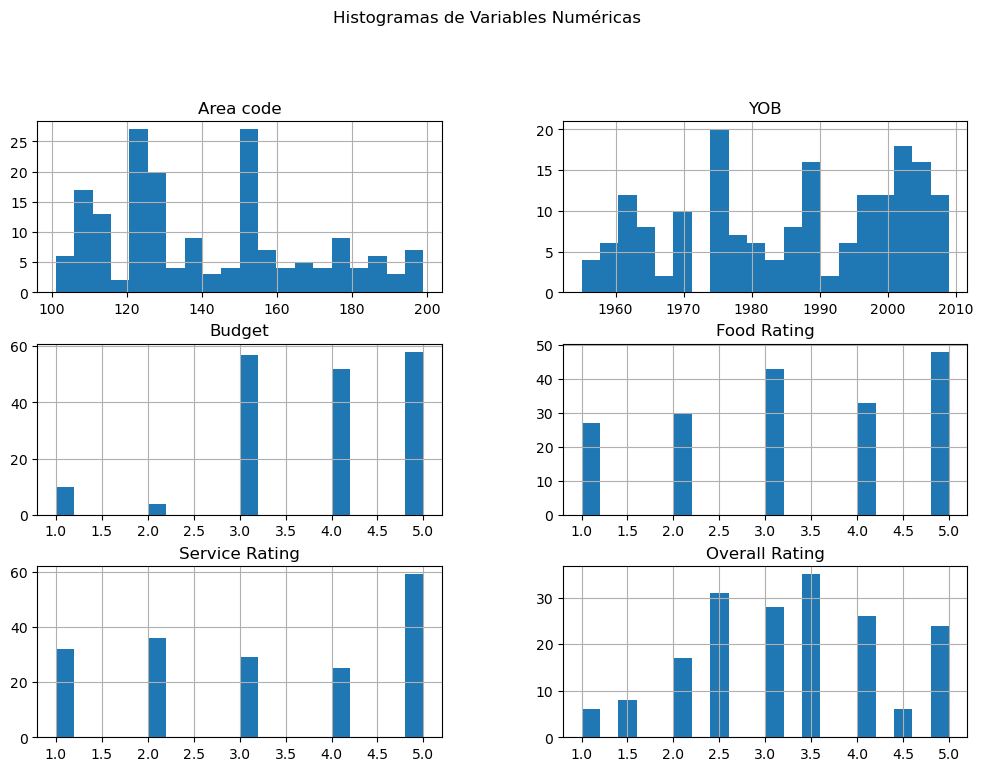

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,141.624309,1985.939227,3.795580,3.248619,3.237569,3.243094
std,26.735375,16.006653,1.088925,1.398039,1.518011,1.054893
min,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,123.000000,1974.000000,3.000000,2.000000,2.000000,2.500000
50%,136.000000,1988.000000,4.000000,3.000000,3.000000,3.500000
75%,158.000000,2001.000000,5.000000,5.000000,5.000000,4.000000
max,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
# Histogramas
df[['Area code', 'YOB', 'Budget', 'Food Rating', 'Service Rating', 'Overall Rating']].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de Variables Numéricas', y=1.02)
plt.show()
df_nums.describe()

Mostramos la distribución de las columnas Area code y YOB.

/home/ivang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ivang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


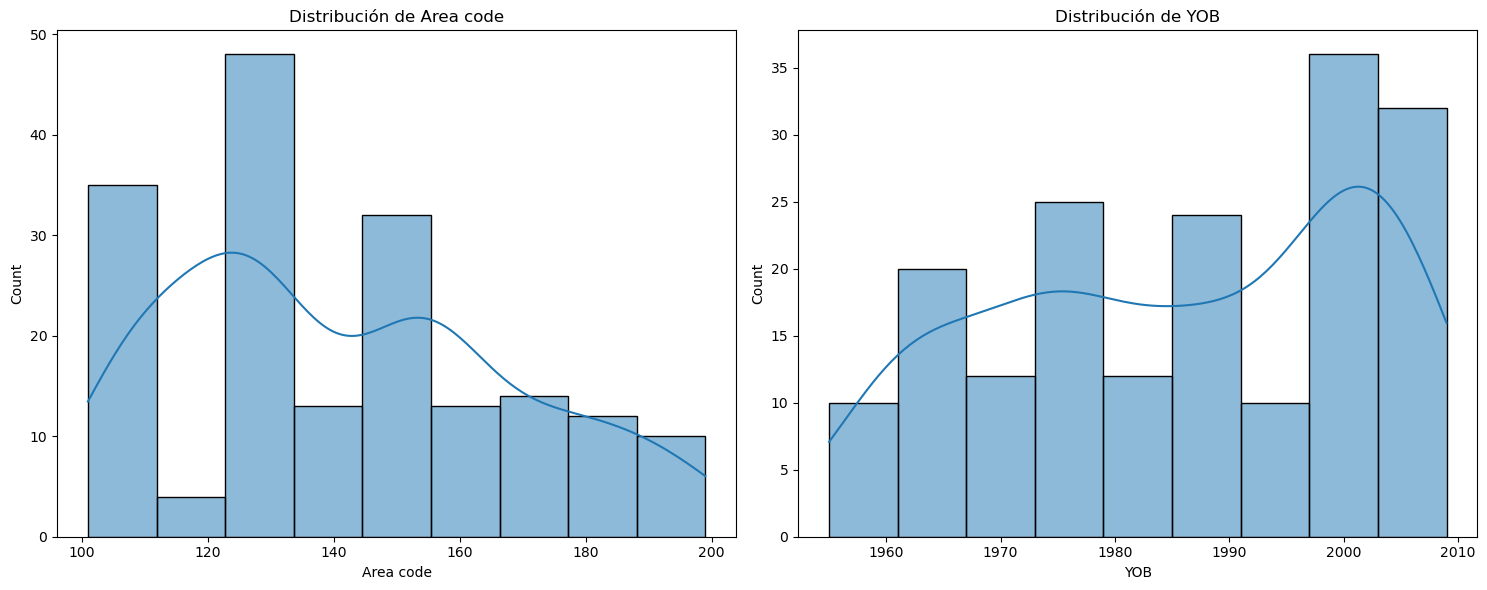

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(df['Area code'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Area code')

sns.histplot(df['YOB'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de YOB')

plt.tight_layout()
plt.show()

Mostramos las correlaciones entre columnas. Todas las columnas de valoraciones (ratings) tienen muy buena correlación.

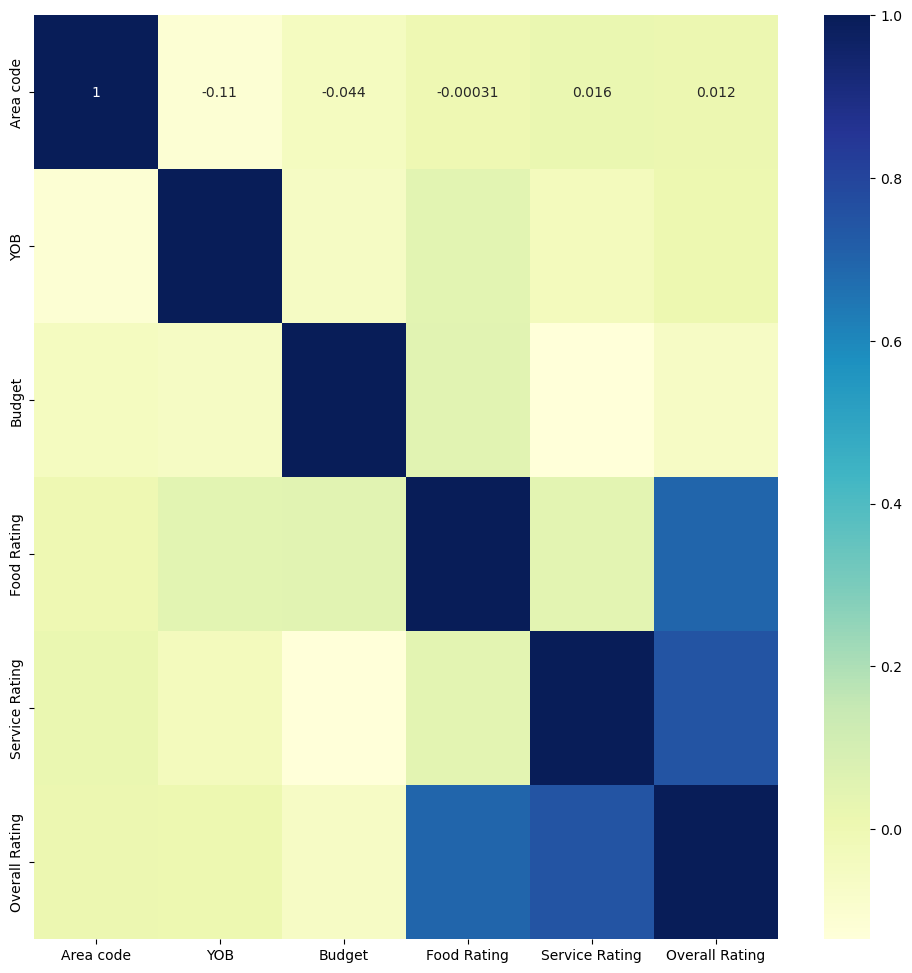

In [23]:
plt.figure(figsize = (12, 12))
cor=df_nums.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

Al mostrar las correlaciones de Overral Rating podemos ver que tiene muy buena correlación con Service Rating y Food Rating.

In [24]:
cor["Overall Rating"].sort_values(ascending=False)

Overall Rating    1.000000
Service Rating    0.749536
Food Rating       0.695247
Area code         0.011530
YOB               0.009434
Budget           -0.062900
Name: Overall Rating, dtype: float64

## EDA Análisis categórico	

Mostramos las columnas categóricas.

In [25]:
cats = list(df.select_dtypes(include=['object']).columns)
print(f'Variables categóricas: {cats}')

Variables categóricas: ['Location', 'Gender', 'Marital Status', 'Activity', 'Cuisines', 'Alcohol ', 'Smoker', 'Often A S']


Mostramos todos los valores diferentes para cada columna.

In [26]:
df_cats = df[cats]
df[cats].nunique(axis=0)

Location          9
Gender            2
Marital Status    3
Activity          2
Cuisines          7
Alcohol           3
Smoker            3
Often A S         2
dtype: int64

Obsevamos mediante una gráfica las diferentes localizaciones.

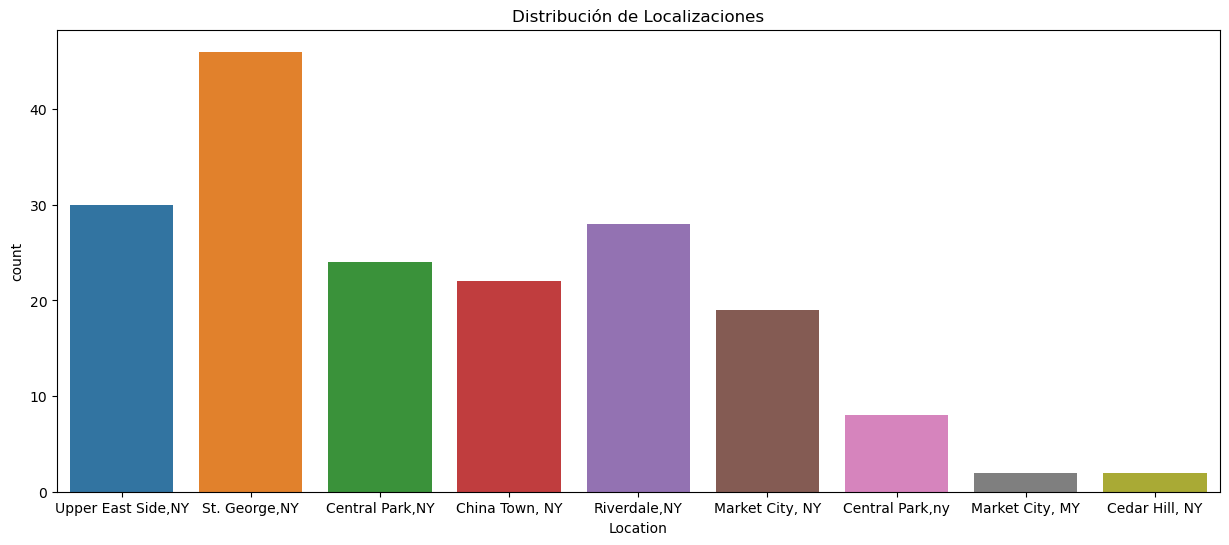

In [27]:
plt.figure(figsize=(15, 6))
plt.title('Distribución de Localizaciones')

sns.countplot(x=df["Location"], data=df)

plt.show()

Observamos la distribución de genero.

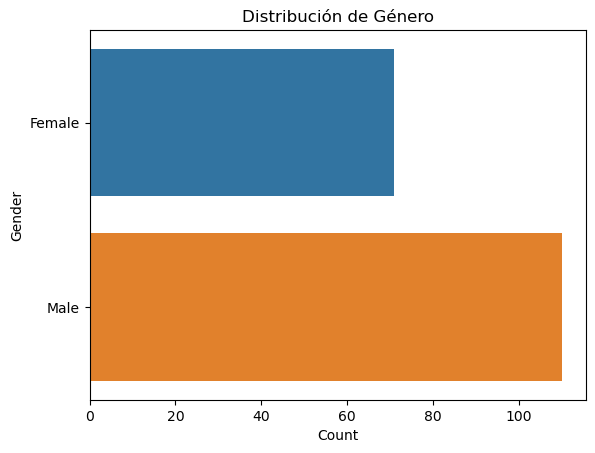

In [28]:
sns.countplot(y='Gender', data=df)
plt.title('Distribución de Género')
plt.xlabel('Count')
plt.ylabel('Gender')

plt.show()

Mediante un gráfico circular observamos los diferentes tipos de cocina.

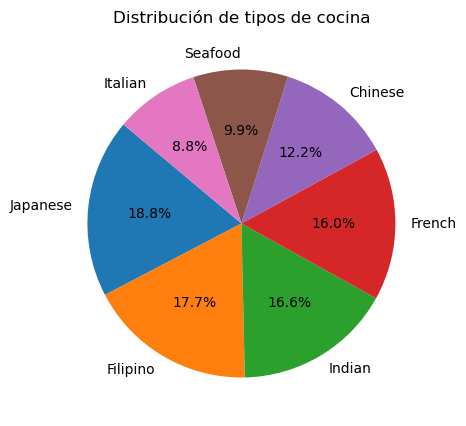

In [29]:
cuisines_counts = df['Cuisines'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(cuisines_counts, labels=cuisines_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de tipos de cocina')

plt.show()

Ahora representamos la relación entre las localizaciones y tipos de comida.

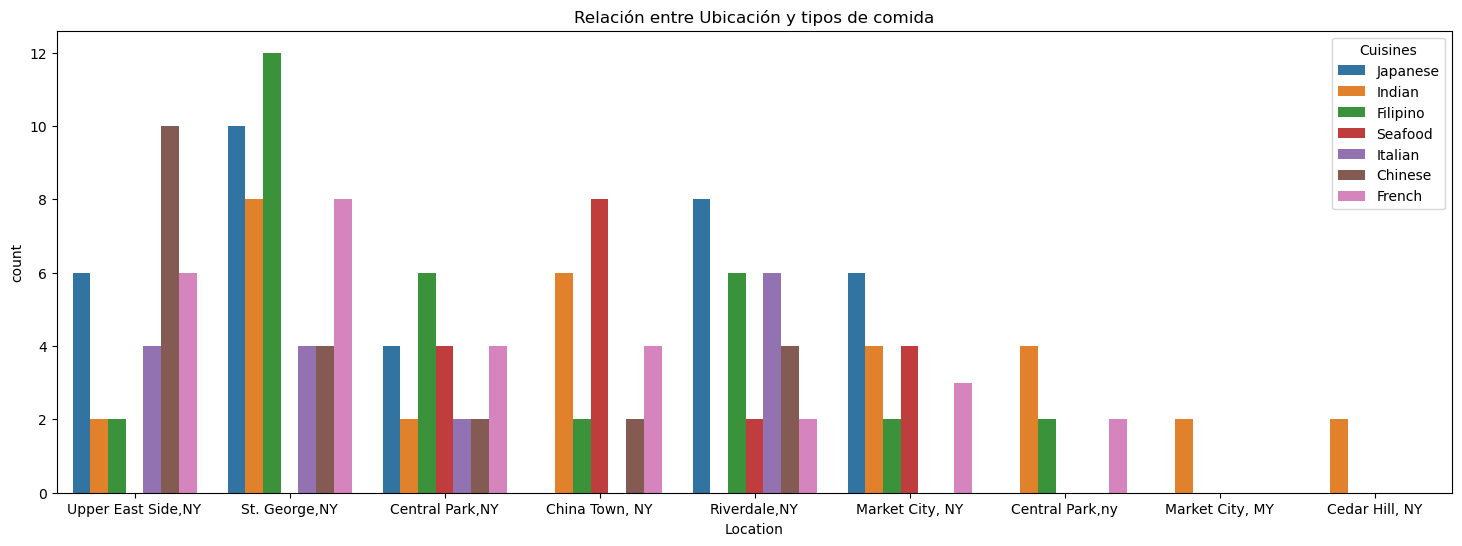

In [30]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Location', hue='Cuisines', data=df)
plt.title('Relación entre Ubicación y tipos de comida')
plt.show()

Observamos la distribución del estado civil.

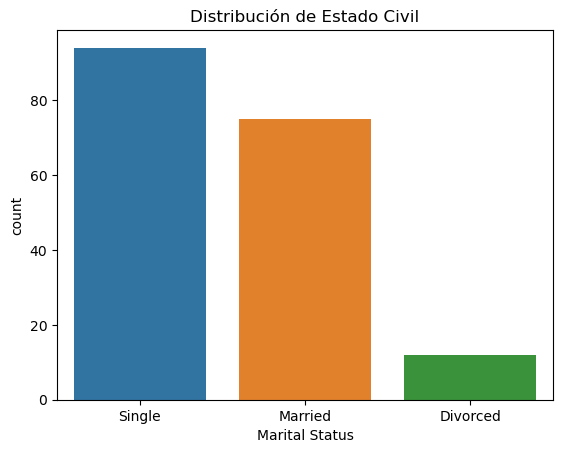

In [31]:
sns.countplot(x='Marital Status', data=df)
plt.title('Distribución de Estado Civil')
plt.show()

Observamos la distribución del estado laboral.

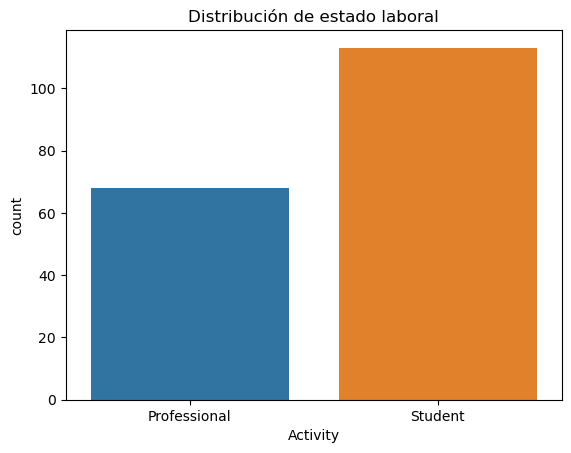

In [32]:
sns.countplot(x='Activity', data=df)
plt.title('Distribución de estado laboral')
plt.show()

Por último obtenemos la relación entre el consumo de alcohol y tabaco.

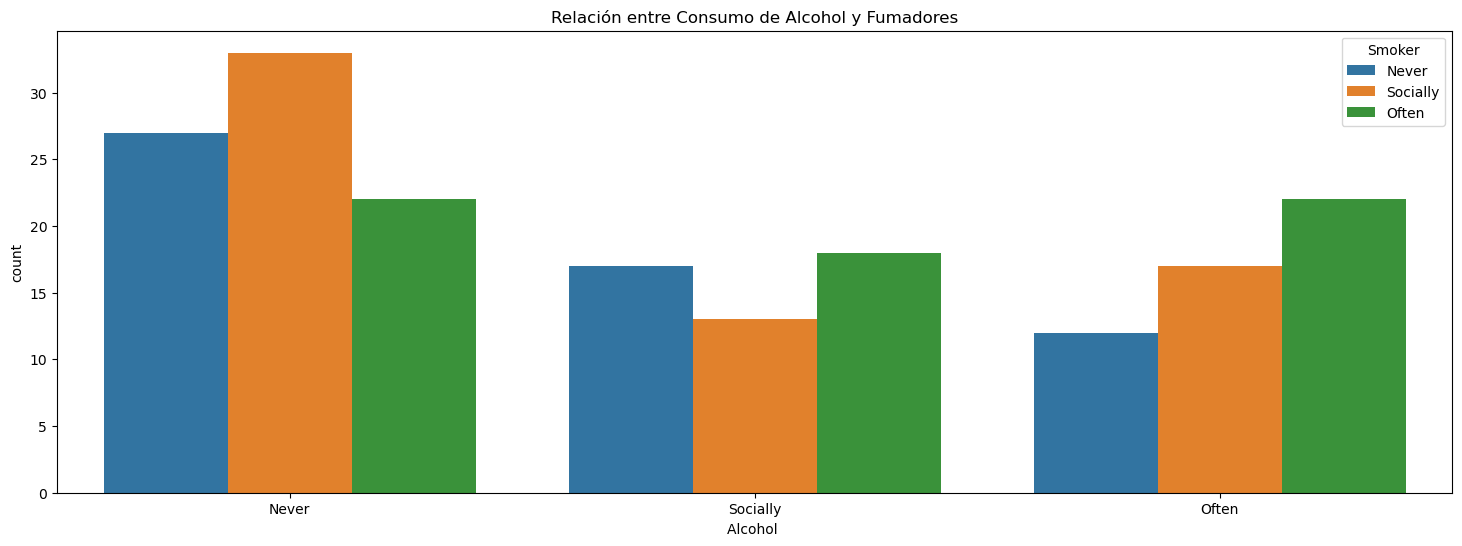

In [33]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Alcohol ', hue='Smoker', data=df)
plt.title('Relación entre Consumo de Alcohol y Fumadores')
plt.show()

## EDA Análisis categórico vs numérico

Para empezar el análisis categórico vs numérico, representamos la distribución de Food Rating por tipo de comida.

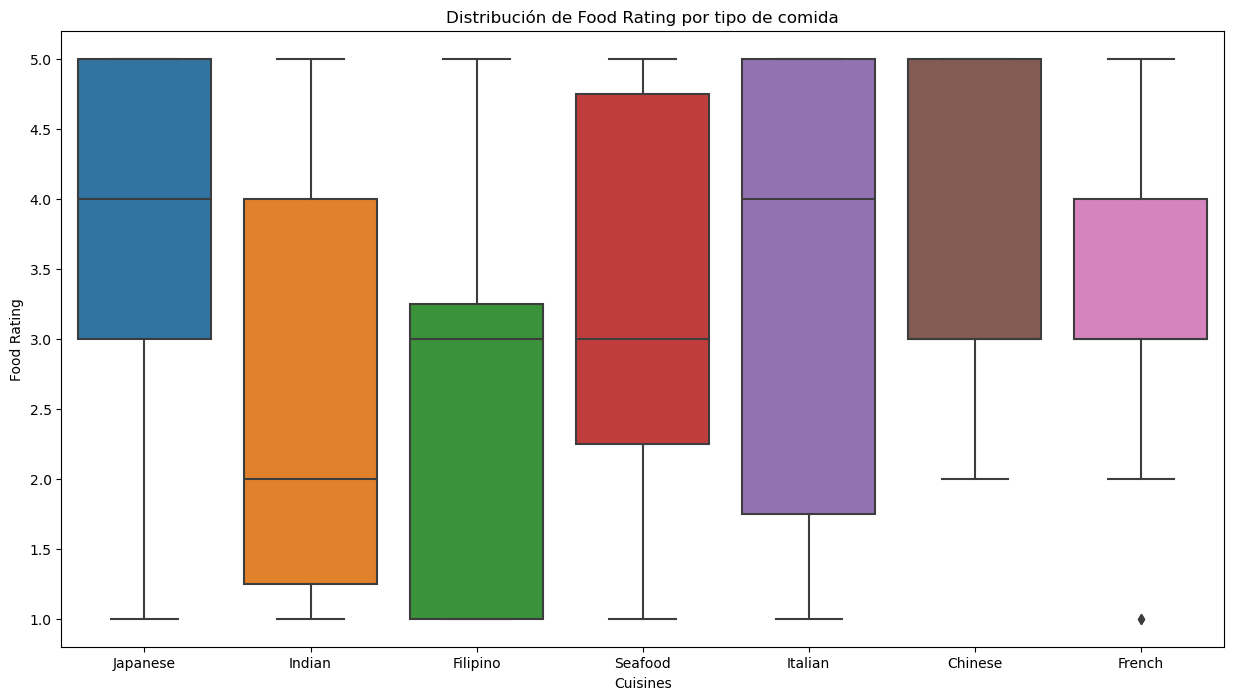

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Cuisines', y='Food Rating', data=df)
plt.title('Distribución de Food Rating por tipo de comida')
plt.show()

Comparamos las valoraciones de comida según el genero.

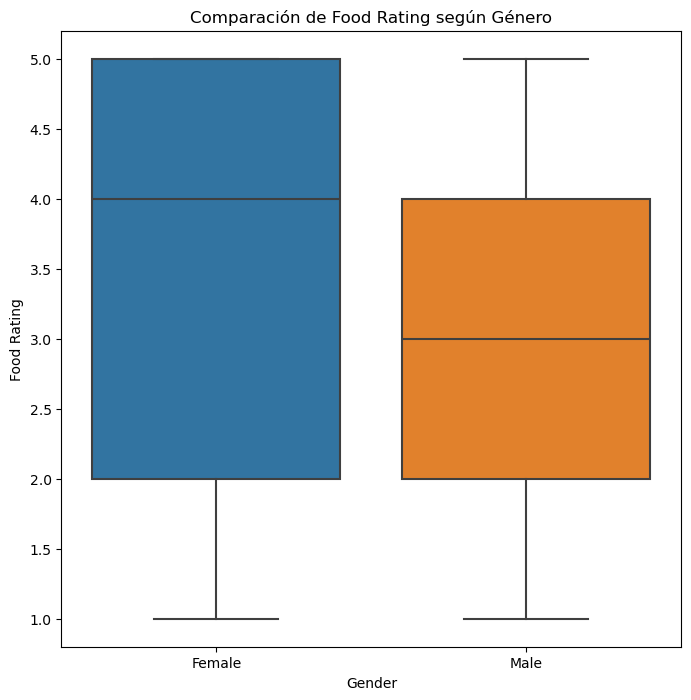

In [35]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Gender', y='Food Rating', data=df)
plt.title('Comparación de Food Rating según Género')
plt.show()

Comparamos la valoración del servicio según el estado laboral.

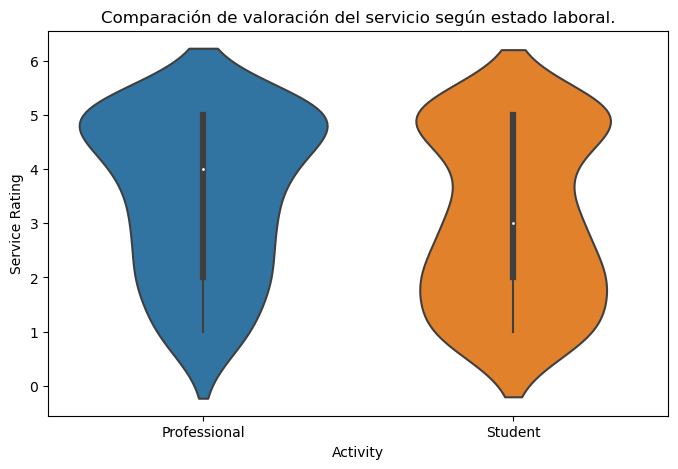

In [36]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Activity', y='Service Rating', data=df)
plt.title('Comparación de valoración del servicio según estado laboral.')
plt.show()

Por último, representamos la distribución de Food Rating según género.

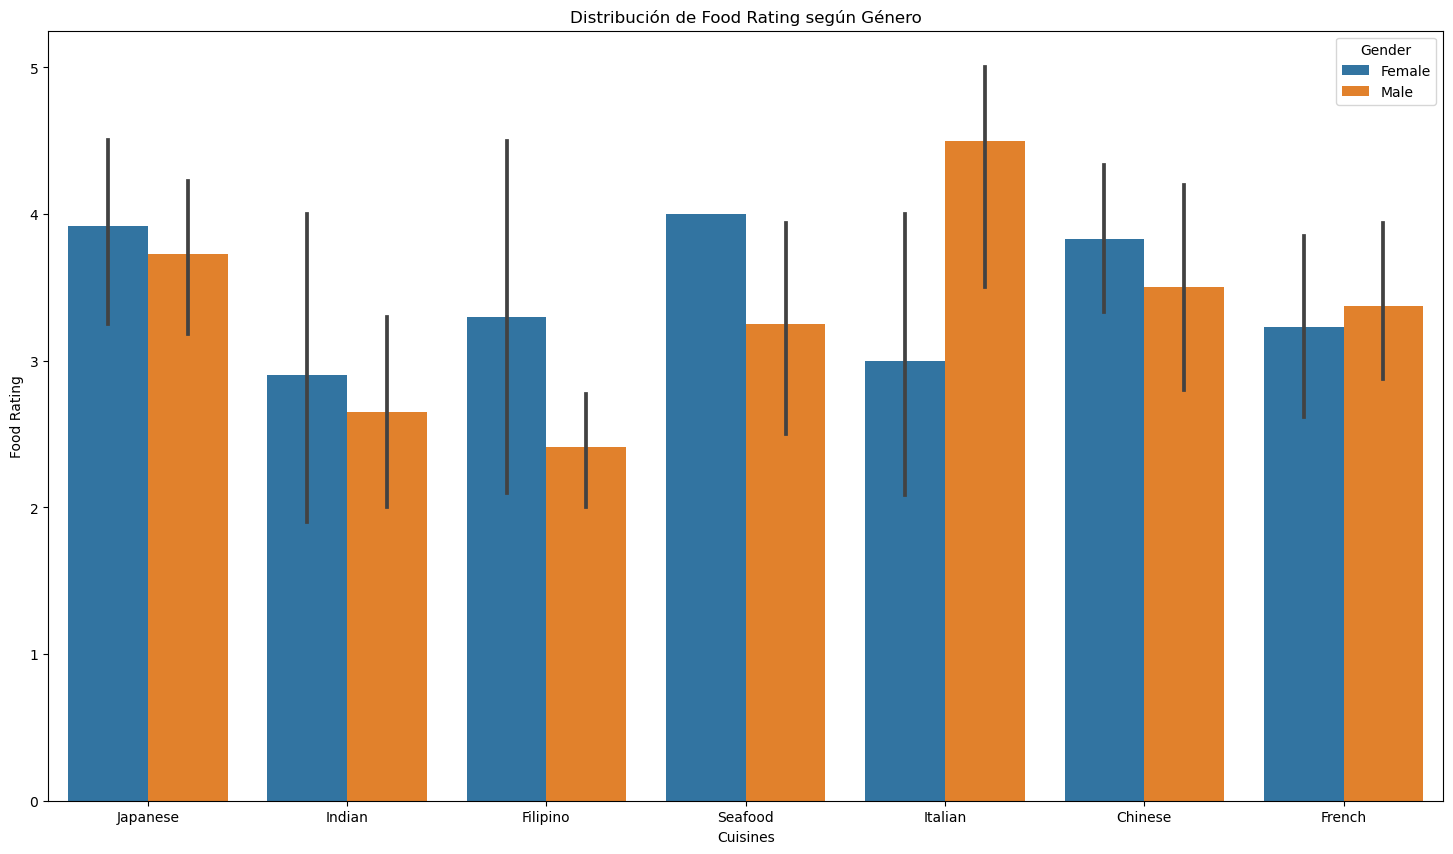

In [37]:
plt.figure(figsize=(18, 10))
sns.barplot(x='Cuisines', y='Food Rating', hue='Gender', data=df)
plt.title('Distribución de Food Rating según Género')
plt.show()

## Conclusión

**1 - Limpieza de datos:**
Se realizó una limpieza y análisis de datos para abordar la presencia de valores nulos. Se optó por el método de relleno para los valores faltantes en la columna YOB y por la eliminación de las filas en la columna Location. No se identificaron outliers significativos en los datos.

**2 - Análisis numérico:** Se llevó a cabo un análisis detallado de las variables numéricas para comprender su distribución y estadísticas descriptivas.

**3 - Análisis categórico:** Se exploraron las distribuciones de las variables categóricas para obtener una comprensión de la frecuencia de cada categoría.

**4 - Análisis categórico vs numérico:** Se analizaron las relaciones entre las variables numéricas y categóricas.